In [2]:
import obspy as op
import numpy as np
import cartopy.crs as ccrs
from obspy.clients.fdsn import Client
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime

import pandas as pd

Though many people (my family included) believe that earthquakes in "uncommon" areas are caused by fracking, there are some lesser known fault lines that lead to earthquakes outside of California. Two fault lines that cause earthquakes in the Midwestern United States are the Wabash Valley and the New Madrid Fault Lines. 

It's a concern that the New Madrid Faultline is becoming less active while the Wabash Valley one is becoming more active (relevant anecdotal aside: my first ever earthquake was the 5.4 one the Wabash Faultline produced in 2008)

In [3]:
#Wabash Valley: points that make the box are 39.04316, -89.07603; 39.03007, -87.15418; 
#37.82211, -89.10872; 37.82691, -87.5058

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2021-10-28T00:00:00") #end time of the request
minLat1 = 37.82211
maxLat1 = 39.04316
minLon1 = -89.10872
maxLon1 = -87.5058
minMag = 2.5
wabash = client.get_events(starttime=t1, endtime=t2, minlatitude=minLat1, maxlatitude=maxLat1,
minlongitude=minLon1, maxlongitude=maxLon1, minmagnitude=minMag)

In [4]:
#New Madrid: 37.24399, -90.05458; 37.02086, -88.03854; 35.46697, -90.96069; 35.46697, -89.43359

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2021-10-28T00:00:00") #end time of the request
minLat2 = 35.46697
maxLat2 = 37.24399
minLon2 = -90.96069
maxLon2 = -88.03854
minMag = 2.5
madrid = client.get_events(starttime=t1, endtime=t2, minlatitude=minLat2, maxlatitude=maxLat2,
minlongitude=minLon2, maxlongitude=maxLon2, minmagnitude=minMag)

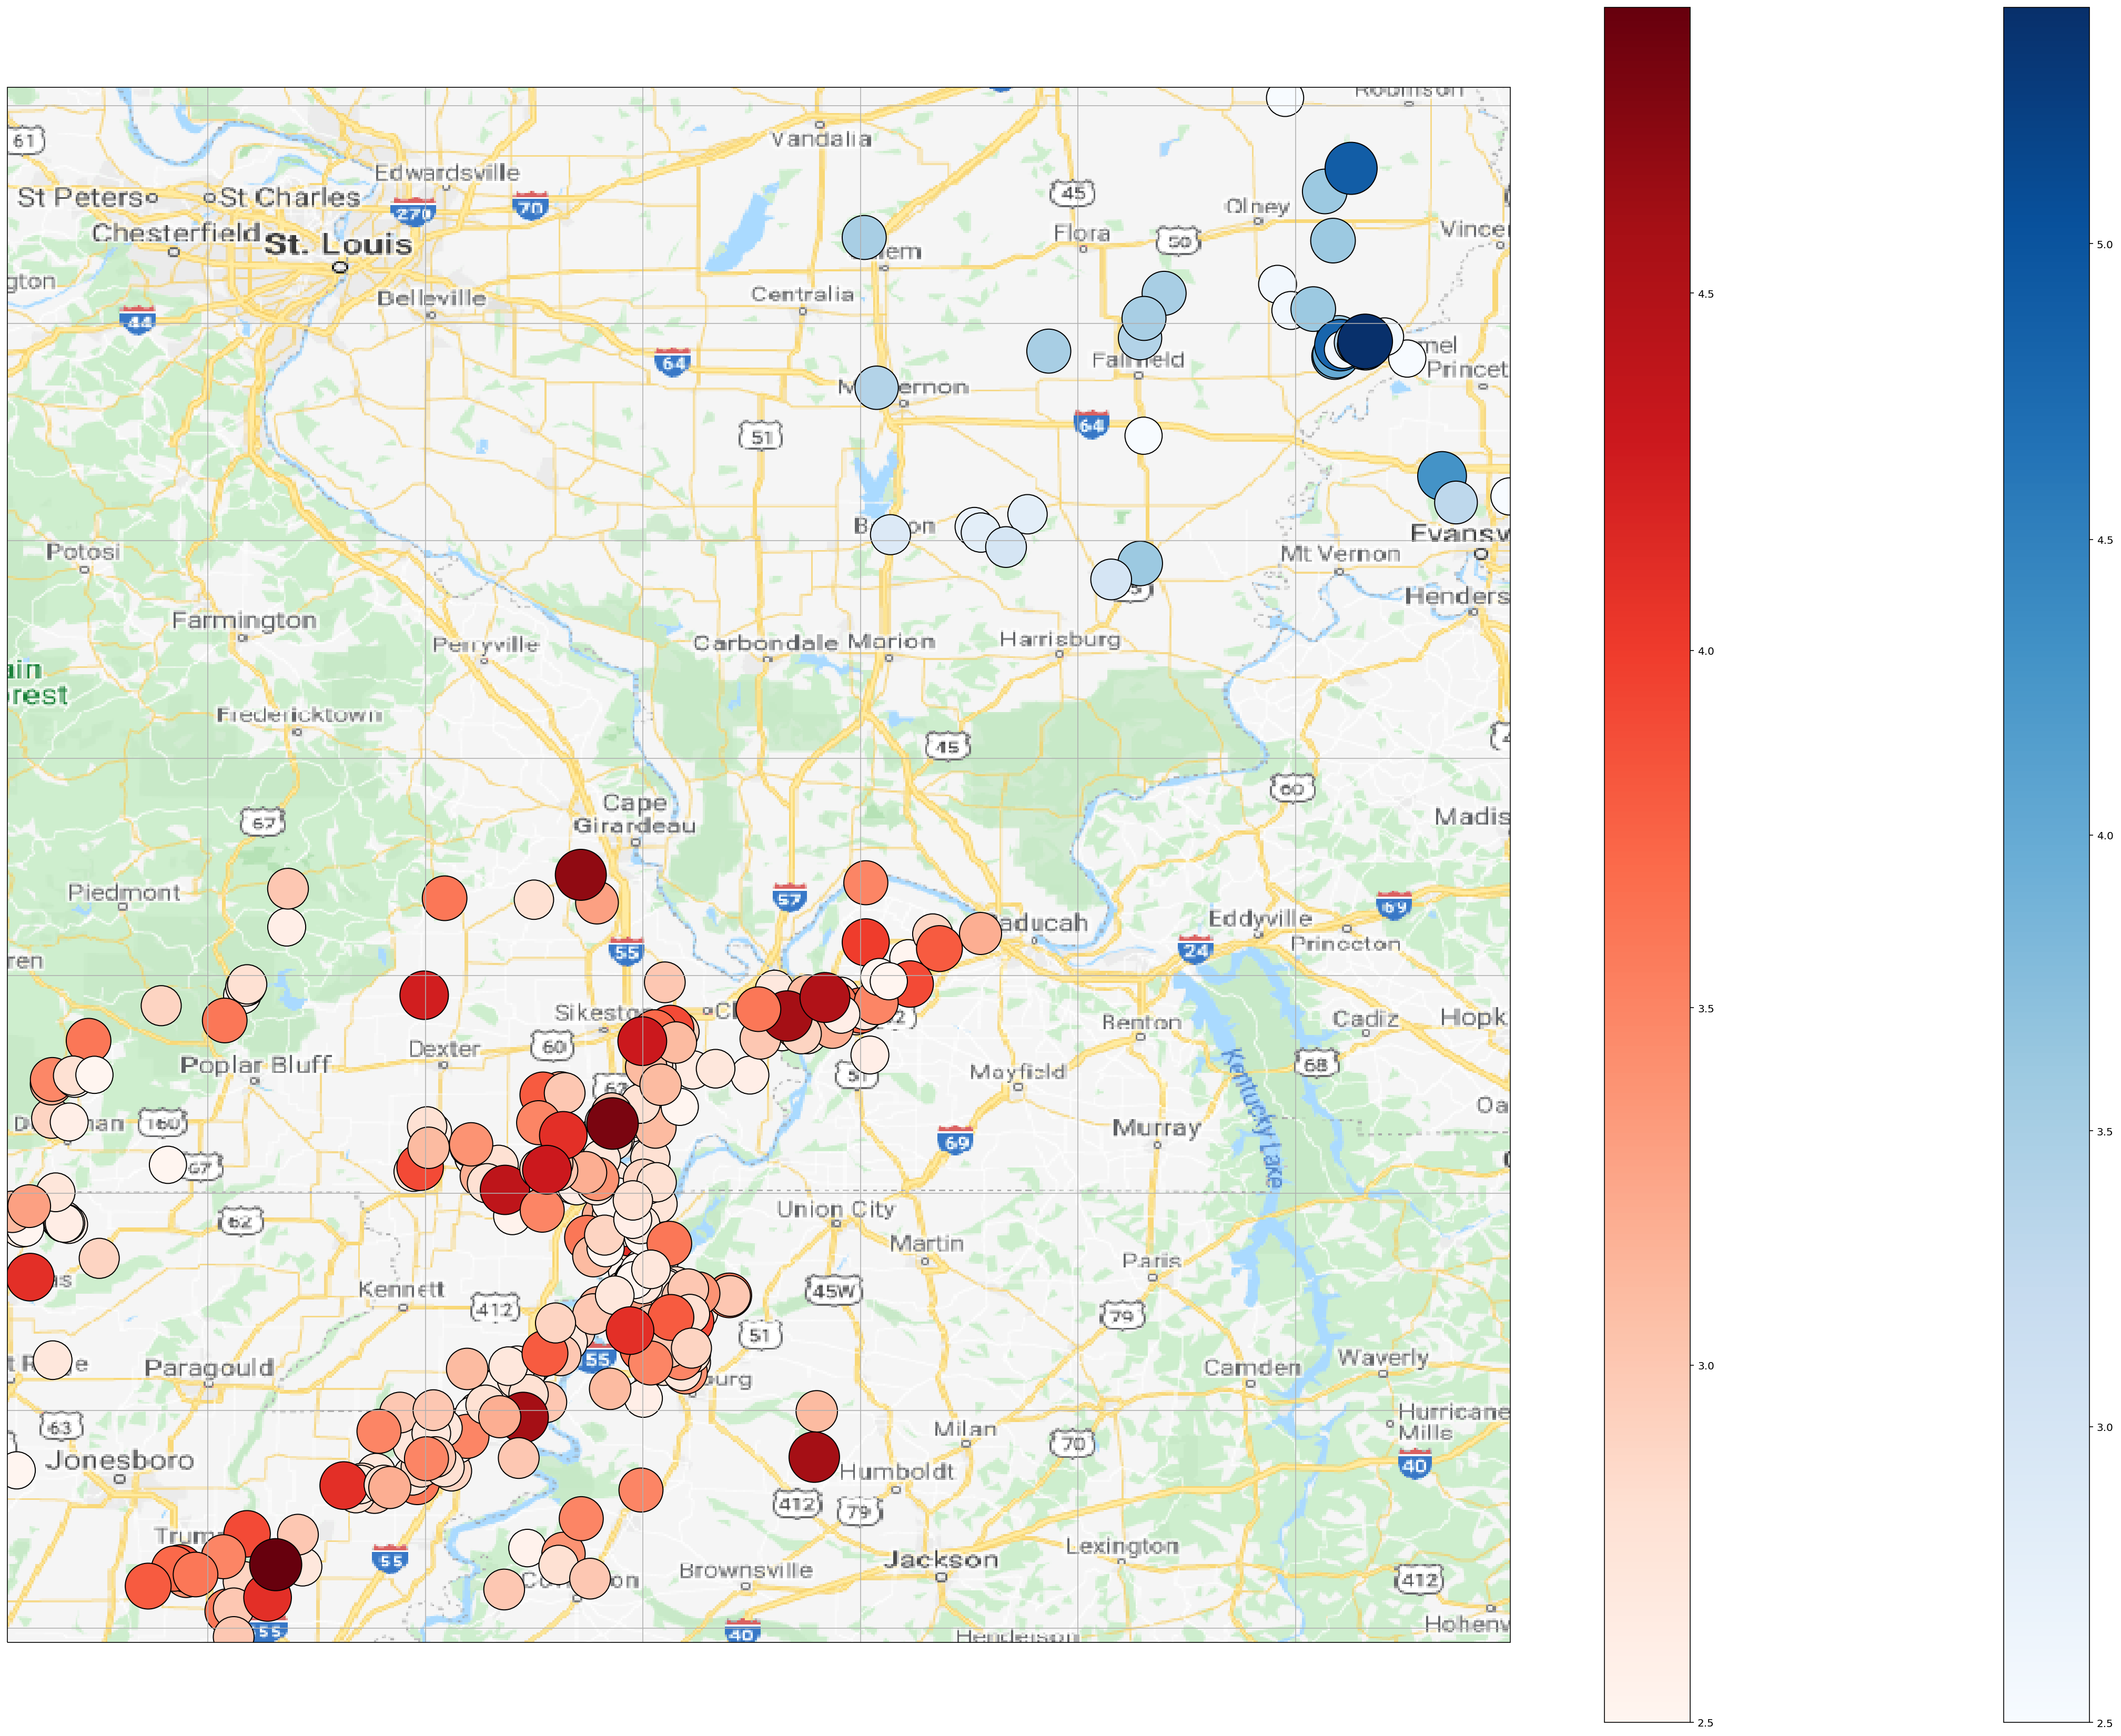

In [5]:
longw=[]
latw=[]
magw=[]

for i in range(len(wabash.events)-1):
    latw.append(wabash[i].origins[0].latitude)
    longw.append(wabash[i].origins[0].longitude)
    magw.append(wabash[i].magnitudes[0].mag)
    
    
longm=[]
latm=[]
magm=[]

for i in range(len(madrid.events)-1):
    latm.append(madrid[i].origins[0].latitude)
    longm.append(madrid[i].origins[0].longitude)
    magm.append(madrid[i].magnitudes[0].mag)

sw=[(element * 500) for element in magw]
sm=[(element * 500) for element in magm]

fig = plt.figure(figsize=(40,30))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([minLon2,maxLon1,minLat2,maxLat1], crs=ccrs.PlateCarree())
ax.gridlines()

import cartopy.io.img_tiles as cimgt
request = cimgt.GoogleTiles()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_image(request, 8)

wg=ax.scatter(longw, latw, c=magw,s=sw,transform=ccrs.PlateCarree(), cmap='Blues', edgecolors='k')
plt.colorbar(wg)
mg=ax.scatter(longm, latm, c=magm,s=sm,transform=ccrs.PlateCarree(), cmap='Reds', edgecolors='k')
plt.colorbar(mg)

In [6]:
yearw=[]
for i in range(len(wabash.events)-1):
    yearw.append(wabash[i].origins[0].time.year)
    
yearm=[]
for i in range(len(madrid.events)-1):
    yearm.append(madrid[i].origins[0].time.year)
    
yearw.reverse()
yearm.reverse()
longw.reverse()
latw.reverse()
magw.reverse()
longm.reverse()
latm.reverse()
magm.reverse()

years=yearw+yearm
years=np.unique(years)

w={'Year': yearw, 'Longitude': longw, 'Latitude': latw, 'Magnitude': magw}
w=pd.DataFrame(data=w)
m={'Year': yearm, 'Longitude': longm, 'Latitude': latm, 'Magnitude': magm}
m=pd.DataFrame(data=m)

In [36]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title='Earthquakes', artist='Colleluori')
writer = FFMpegWriter(fps=5, metadata=metadata,bitrate=200000)
fig = plt.figure(figsize=(20,20))

%matplotlib osx

with writer.saving(fig, "earthquakes.mp4", dpi=200):
    for i in years:
        m_ind=np.where(m.Year==i)[0]
        w_ind=np.where(w.Year==i)[0]
        longw=[]
        latw=[]
        magw=[]
        longm=[]
        latm=[]
        magm=[]

        for j in w_ind:
            longw.append(w.Longitude[j])
            latw.append(w.Latitude[j])
            magw.append(w.Magnitude[j])
        for j in m_ind:
            longm.append(m.Longitude[j])
            latm.append(m.Latitude[j])
            magm.append(m.Magnitude[j])
        
        sw=[(element * 500) for element in magw]
        sm=[(element * 500) for element in magm]
        
        fig.clear()

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
        ax.set_extent([minLon2,maxLon1,minLat2,maxLat1], crs=ccrs.PlateCarree())
        ax.set_title(i, fontsize=50)
        ax.gridlines()

        import cartopy.io.img_tiles as cimgt
        request = cimgt.GoogleTiles()
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_image(request, 8)
        
        ax.scatter(longw, latw, c=magw,s=sw,transform=ccrs.PlateCarree(), cmap='Blues', edgecolors='k')
        ax.scatter(longm, latm, c=magm,s=sm,transform=ccrs.PlateCarree(), cmap='Reds', edgecolors='k')
        plt.draw()
        plt.pause(0.5)
        writer.grab_frame()

<Figure size 864x576 with 0 Axes>

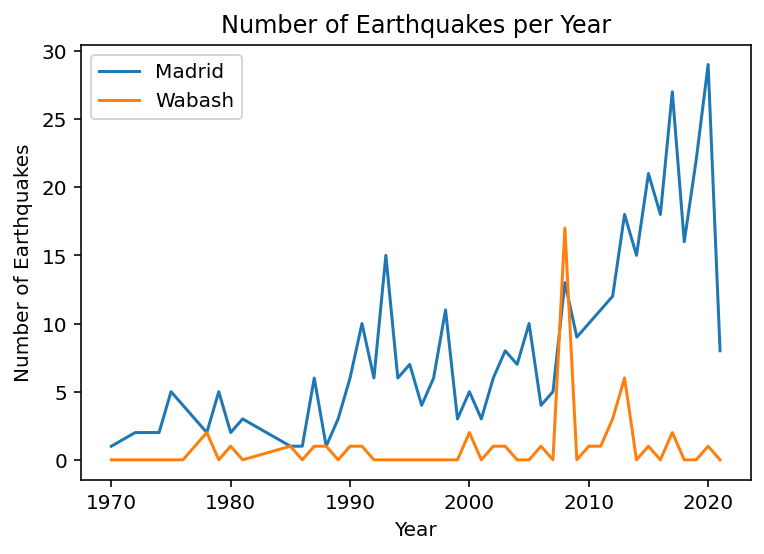

In [7]:
m_y=[]
w_y=[]

for i in years:
    m_y.append(len(np.where(m.Year==i)[0]))
    w_y.append(len(np.where(w.Year==i)[0]))
    
%matplotlib inline
plt.plot(years, m_y, label='Madrid')
plt.plot(years, w_y, label='Wabash')
plt.legend()
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

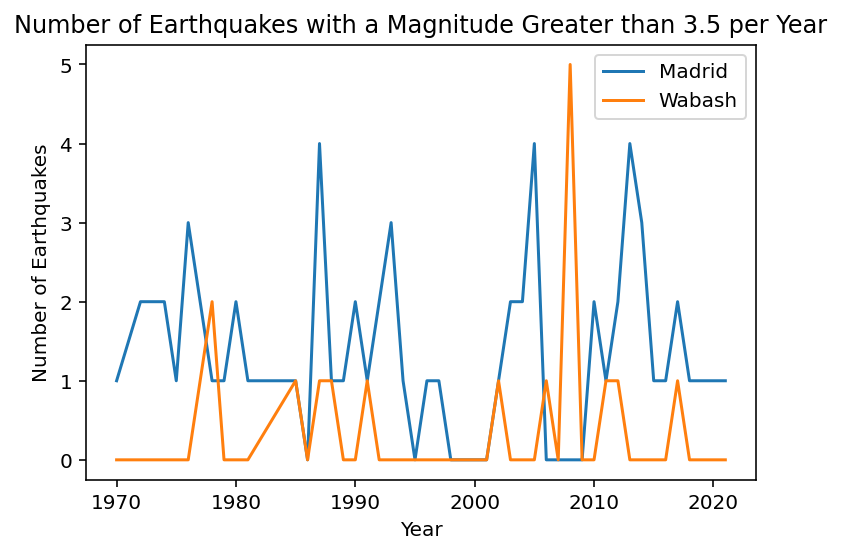

In [8]:
m_big=m[m.Magnitude >=3.5]
w_big=w[w.Magnitude >= 3.5]

m_yb=[]
w_yb=[]

for i in years:
    m_yb.append(len(np.where(m_big.Year==i)[0]))
    w_yb.append(len(np.where(w_big.Year==i)[0]))
    
%matplotlib inline
plt.plot(years, m_yb, label='Madrid')
plt.plot(years, w_yb, label='Wabash')
plt.title('Number of Earthquakes with a Magnitude Greater than 3.5 per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.legend()
plt.show()

In [9]:
print(np.unique(m.Magnitude))
print(np.unique(w.Magnitude))

[ 2.5   2.51  2.52  2.53  2.54  2.56  2.57  2.59  2.6   2.61  2.62  2.63
  2.64  2.65  2.66  2.67  2.68  2.69  2.7   2.71  2.72  2.74  2.76  2.77
  2.78  2.8   2.81  2.84  2.86  2.87  2.89  2.9   2.95  2.98  3.    3.02
  3.04  3.05  3.1   3.16  3.2   3.26  3.27  3.3   3.4   3.44  3.48  3.5
  3.6   3.64  3.69  3.7   3.8   3.9   4.    4.1   4.25  4.3   4.4   4.5
  4.6   4.7   4.8   4.9 ]
[ 2.5   2.6   2.7   2.8   2.9   3.    3.06  3.1   3.3   3.4   3.5   3.6
  3.8   4.    4.3   4.8   4.9   5.4 ]
